## Data pre-processing

In [103]:
import numpy as np
import gurobipy as gp
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [59]:
# Reading training and test data
train = pd.read_csv("training_data.CSV")
test = pd.read_csv("test_data.CSV")

# Setting time_limit for each model run to 300 seconds or 5 minutes
time_limit = 300

In [3]:
train.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,8.536145,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,4.808344,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,-1.530427,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,-0.428243,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,0.566694,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748


In [4]:
test.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,7.107949,-2.047008,0.260132,-0.785152,0.384576,-0.137613,-0.364566,-1.941253,-0.108180,-0.339223,...,-0.522194,1.861897,0.124511,1.144071,0.128179,-0.467972,-1.085601,0.659670,0.514719,0.806656
1,5.796272,-1.354328,-1.289884,1.321533,-0.091165,-1.021874,0.686778,0.089737,-0.398371,-0.261740,...,-0.502578,0.584476,0.680703,0.046788,0.569681,-1.099062,-0.069656,0.709273,-0.848665,0.996168
2,1.598651,0.502205,1.062887,1.460733,-1.506403,0.721664,0.528921,-0.699541,-0.270331,-2.544812,...,-0.125195,-1.292924,0.411785,-0.164210,-2.407403,-1.132500,0.452923,-0.945541,0.126523,-0.972075
3,2.532953,0.222381,-0.960747,-0.113762,1.935927,0.969387,-1.641403,0.026647,0.747138,-1.571784,...,-0.546915,-0.192517,0.603420,-0.277331,-1.451419,0.220775,0.474954,-0.160109,0.188047,-1.711229
4,0.590685,1.209949,1.586874,-0.694784,-0.226370,-0.152108,0.772356,-0.573741,-0.992492,-0.646661,...,-0.982236,-1.407777,0.094211,0.159960,-0.901612,-1.653122,0.393518,0.702539,0.552663,-0.773646


In [5]:
# Splitting the data into x and y
x_train = train.drop(columns=['y'])
x_test = test.drop(columns=['y'])
y_train = train['y']
y_test = test['y']

In [6]:
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,0.865598,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,1.838930,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,-1.105334,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,-0.314318,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,0.431451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748


## EDA - Correlation Matrix

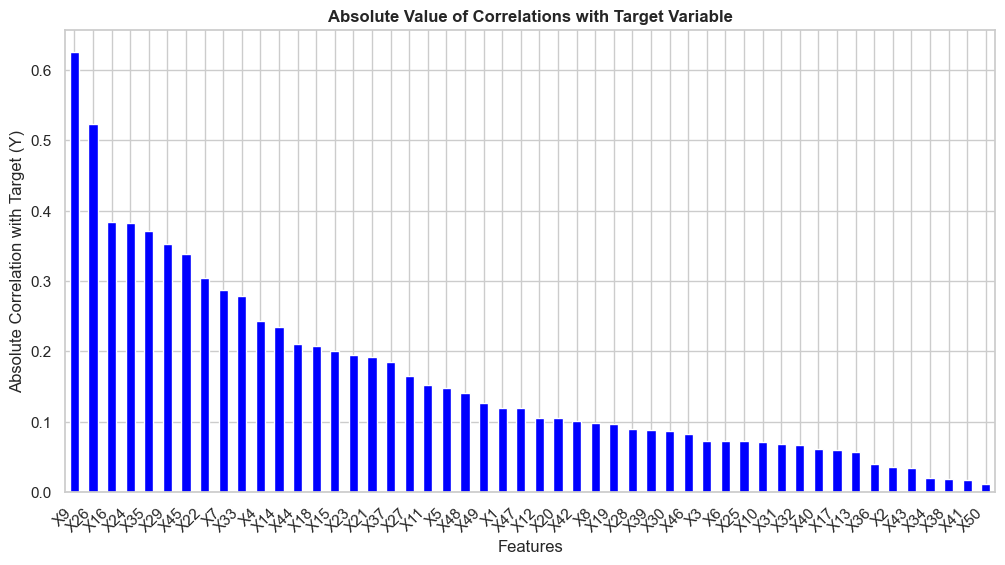

In [275]:
# Separate features (X1 to X50) and target variable Y
features = train.iloc[:, 1:]  # Assuming the features are in columns X1 to X50
target = train.iloc[:, 0]     # Assuming the target variable is in the last column 'Y'

# Calculate the correlation between each feature and the target variable
correlations = features.apply(lambda x: x.corr(target))

# Sort correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Plot the absolute values of correlations in descending order
plt.figure(figsize=(12, 6))
sorted_correlations.plot(kind='bar', color='blue')
plt.title('Absolute Value of Correlations with Target Variable', fontsize=12, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Target (Y)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Question 1& 2 - Identifying best value of K using Cross-Validation

In [7]:
# Setting up batches
batches = 10
n_variables = x_train.shape[1]
n_rows = x_train.shape[0]
dat_per_bat = n_rows//batches
shuf = np.random.choice(range(n_rows),size=n_rows,replace=False)

In [234]:
# Creating a dataframe to store results
Results = pd.DataFrame(columns = ['K', 'SSE_train', 'SSE_val'])
Results['K'] = range(5, n_variables+1, 5)
Results.set_index('K', inplace = True)
Results

,SSE_train,SSE_val
K,,
5,NaN,NaN
10,NaN,NaN
15,NaN,NaN
20,NaN,NaN
25,NaN,NaN
30,NaN,NaN
35,NaN,NaN
40,NaN,NaN
45,NaN,NaN


In [235]:
# Taking Big-M as 10
M = 10

# Looping over values of k
for k in range(5, n_variables+1, 5):
    #Initializing a list to store the validation SSE for each batch for a given k
    SSE_k_train = []
    SSE_k_val = []

    # Looping over the 10 batches within each k
    for bat in range(batches):
        
        # Setting up training and validation batches
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        X_train_bat = x_train.drop(this_bat)
        X_val_bat = x_train.iloc[this_bat]
        y_train_bat = y_train.drop(this_bat)
        y_val_bat = y_train.iloc[this_bat]
        n_rows_train = X_train_bat.shape[0]
        n_rows_val = X_val_bat.shape[0]

        # Setting up the model
        lm = gp.Model()
        beta_intercept = lm.addMVar(1,lb=-np.inf)
        beta_variables = lm.addMVar(n_variables,lb=-np.inf)
        z = lm.addMVar(n_variables, vtype ='B')

        lm.setObjective(gp.quicksum((beta_intercept + gp.quicksum(beta_variables[j]*X_train_bat.iloc[i,j] for j in range (n_variables)) - y_train_bat.iloc[i])*(beta_intercept + gp.quicksum(beta_variables[j]*X_train_bat.iloc[i,j] for j in range (n_variables)) - y_train_bat.iloc[i]) for i in range(n_rows_train)))
        
        
        z_con = lm.addConstr(gp.quicksum(z[j] for j in range(n_variables)) == k)
        Big_M_con_1 = lm.addConstrs(beta_variables[j]<=M*z[j] for j in range(n_variables))
        Big_M_con_2 = lm.addConstrs(beta_variables[j]>=M*(-1)*z[j] for j in range(n_variables))
        
        lm.Params.OutputFlag = 0 # tell gurobi to shut up!!        
        lm.setParam('TimeLimit', time_limit)
        lm.optimize()

        # Calculating validation error for the given batch using the betas identified by the model
        SSE_bat = gp.quicksum((beta_intercept + gp.quicksum(beta_variables[j]*X_val_bat.iloc[i,j] for j in range (n_variables)) - y_val_bat.iloc[i])*(beta_intercept + gp.quicksum(beta_variables[j]*X_val_bat.iloc[i,j] for j in range (n_variables)) - y_val_bat.iloc[i]) for i in range(n_rows_val))
        
        #Storing the errors for each batch
        SSE_k_train.append(lm.ObjVal)
        SSE_k_val.append(SSE_bat[0].getValue())

    # Taking a mean of errors across all batches for a given k
    SSE_k_train_mean = np.mean(SSE_k_train)
    SSE_k_val_mean = np.mean(SSE_k_val)
    
    # Storing the results in the results dataframe 
    Results['SSE_train'][k] = SSE_k_train_mean
    Results['SSE_val'][k] = SSE_k_val_mean
    
    # Printing k to keep track of progress
    print(k)

5
10
15
20
25
30
35
40
45
50


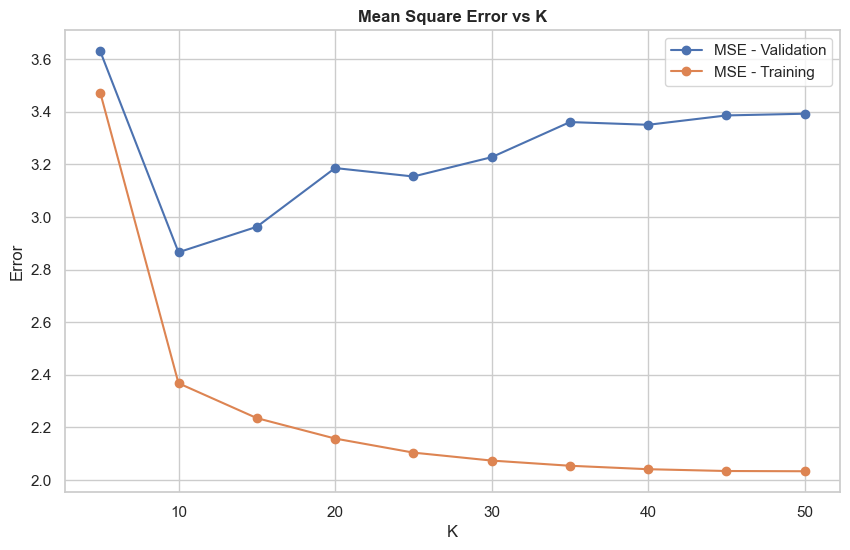

In [236]:
Results['MSE_val'] = Results['SSE_val']/(n_rows/10)
Results['MSE_train'] = Results['SSE_train']/(n_rows*9/10)

# Plotting the mean squared errors for each K

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

plt.plot(Results.index, Results['MSE_val'], marker='o', label='MSE - Validation')
plt.plot(Results.index, Results['MSE_train'], marker='o', label='MSE - Training')

# Adding labels and title
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Mean Square Error vs K', fontsize=12, fontweight='bold')
plt.legend()

# Display the plot
plt.show()

#### From the above plot we can see that the cross-validation error is minimum at K=10

In [237]:
Results.to_csv('Results.csv', index=True)

In [69]:
# Converting SSE column to numeric to be able to use idxmin
Results['SSE'] = pd.to_numeric(Results['SSE'], errors='coerce')

# Getting the best k corresponding to the min error
k_best = Results['SSE'].idxmin()

## question 3 - Final model with best K

In [204]:
# Taking Big-M as 10
M = 10

n_rows_train = x_train.shape[0]
n_rows_test = x_test.shape[0]

# Setting up the model
lm_2 = gp.Model()
beta_intercept = lm_2.addMVar(1,lb=-np.inf)
beta_variables = lm_2.addMVar(n_variables,lb=-np.inf)
z = lm_2.addMVar(n_variables, vtype ='B')

lm_2.setObjective(gp.quicksum((beta_intercept + gp.quicksum(beta_variables[j]*x_train.iloc[i,j] for j in range (n_variables)) - y_train.iloc[i])*(beta_intercept + gp.quicksum(beta_variables[j]*x_train.iloc[i,j] for j in range (n_variables)) - y_train.iloc[i]) for i in range(n_rows_train)))


z_con = lm_2.addConstr(gp.quicksum(z[j] for j in range(n_variables)) == k_best)
Big_M_con_1 = lm_2.addConstrs(beta_variables[j]<=M*z[j] for j in range(n_variables))
Big_M_con_2 = lm_2.addConstrs(beta_variables[j]>=M*(-1)*z[j] for j in range(n_variables))

lm_2.Params.OutputFlag = 0 # tell gurobi to shut up!!        
lm_2.optimize()



In [219]:
y_pred = [beta_intercept.x[0] + sum([beta_variables.x[j]*x_test.iloc[i,j] for j in range (n_variables)]) for i in range(n_rows_test)]

In [220]:
# Calculating test error for the given batch using the betas identified by the model
SSE_test = gp.quicksum((y_pred[i] - y_test[i])*(y_pred[i] - y_test[i]) for i in range(n_rows_test)).getValue()
MSE_test = SSE_test/n_rows_test

print ('Sum of squared errors in Test data is:', SSE_test)
print ('Mean squared errors in Test data is:', MSE_test)

Sum of squared errors in Test data is: 116.82719822762618
Mean squared errors in Test data is: 2.336543964552524


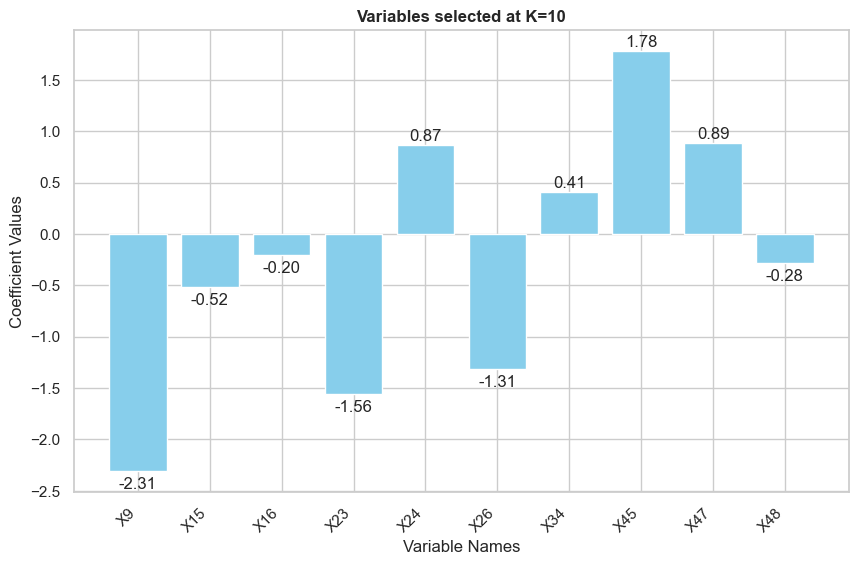

In [221]:
# Plotting the coefficients of the variables selected

# Finding indices of non-zero coefficients
non_zero_indices = np.nonzero(beta_variables.x)[0]

# Extracting non-zero coefficients and corresponding variable names
non_zero_coefficients = beta_variables.x[non_zero_indices]
non_zero_variable_names = np.array(x_train.columns)[non_zero_indices]

# Plotting the non-zero coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(non_zero_variable_names, non_zero_coefficients, color='skyblue')
plt.xlabel('Variable Names')
plt.ylabel('Coefficient Values')
plt.title('Variables selected at K=10', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding data
for bar, label in zip(bars, non_zero_coefficients):
    # Adjust vertical position based on the sign of the coefficient
    vertical_position = label + 0.01 if label >= 0 else label - 0.2
    plt.text(bar.get_x() + bar.get_width() / 2, vertical_position, f'{label:.2f}',
             ha='center', va='bottom')

plt.show()


#### Since none of the coefficients are close to +/-10, our selection of Big-M to be 10 is justified

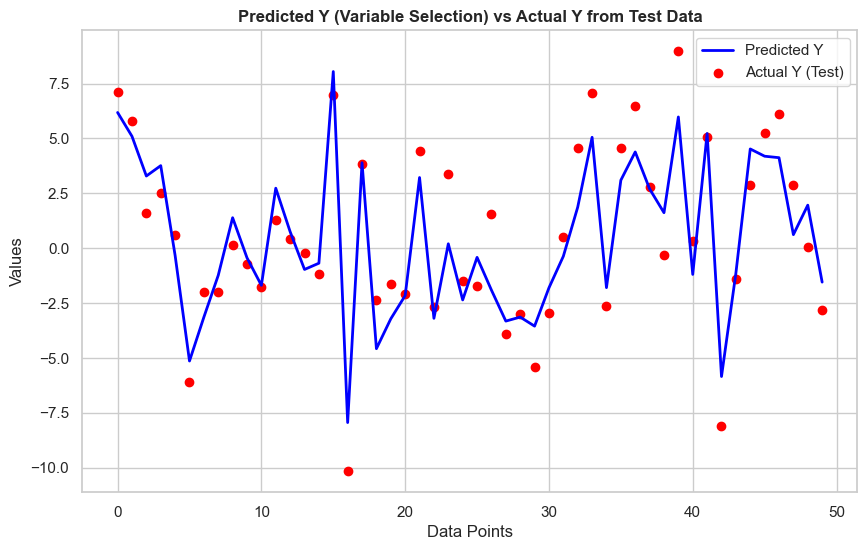

In [222]:
# Plotting the predicted y vs the actual y from test data

fig, ax = plt.subplots(figsize=(10, 6))

# Plot y_pred as a line graph
ax.plot(np.arange(len(y_pred)), y_pred, label='Predicted Y', color='blue', linewidth=2)

# Plot y_test as a scatter plot
ax.scatter(np.arange(len(y_test)), y_test, label='Actual Y (Test)', color='red', marker='o')

# Adding labels and title
ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Predicted Y (Variable Selection) vs Actual Y from Test Data', fontsize=12, fontweight='bold')

# Display legend
ax.legend()

# Show the plot
plt.show()


## Question 4 - Lasso Results

In [260]:
from sklearn.preprocessing import StandardScaler
import warnings

warnings.simplefilter("ignore")

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the training data, then transform the test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Defining a range of alpha values to test (α values)
alphas = np.logspace(-6, 6, 13)

# Performing 10-fold cross-validation to select the best alpha (α) value
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(x_train_scaled, y_train)

# Extracting mean square error for each value of alpha
mse_path = lasso_cv.mse_path_
MSE_val_Lasso = mse_path.mean(axis=1)
Results_Lasso = pd.DataFrame(list(zip(lasso_cv.alphas_, MSE_val_Lasso)), columns=['Alpha', 'MSE'])
Results_Lasso.set_index('Alpha', inplace=True)

# Getting the best alpha value
best_alpha = lasso_cv.alpha_
print("Best alpha (lambda) found:", best_alpha)

# Fitting a Lasso model on the entire training set using the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(x_test_scaled)


Best alpha (lambda) found: 0.1


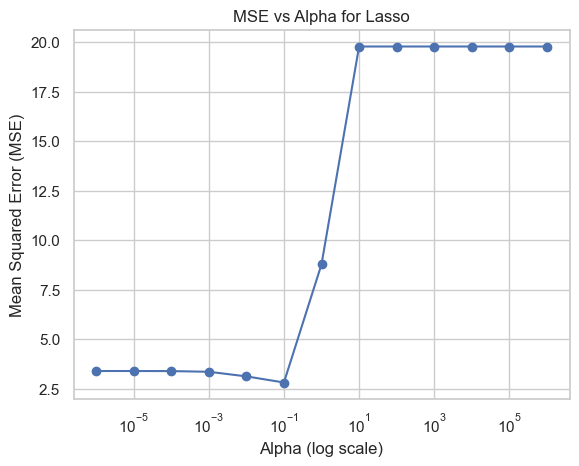

In [263]:
# Plotting the MSE against alphas
plt.plot(Results_Lasso.index, Results_Lasso['MSE'], marker='o')

# Set x-axis to log scale
plt.xscale('log')

# Adding labels and title
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Alpha for Lasso')

# Display the plot
plt.show()

In [264]:
Results_Lasso.to_csv('Results_Lasso.csv', index=True)

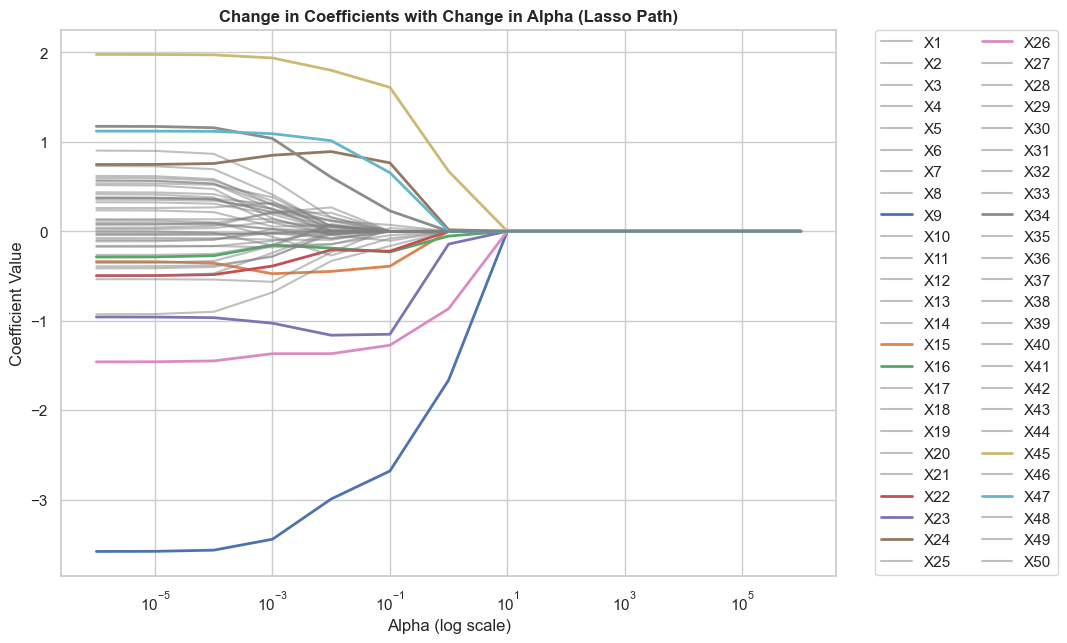

In [225]:
# Plotting the value of coefficients with change in alpha

warnings.simplefilter("ignore")

# Defining a range of alpha values to test (α values)
alphas = np.logspace(-6, 6, 13)

# Initializing an empty list to store coefficients for each alpha
coefficients = []

# Iterating over alpha values
for alpha in alphas:

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train_scaled, y_train)
    
    # Recording coefficients
    coefficients.append(lasso_model.coef_)

coefficients = np.array(coefficients)

# Choosing alpha for highlighting top variables
highlight_alpha = best_alpha

# Identifying the top 10 variables by coefficients at alpha = best_alpha
lasso_model_highlight = Lasso(alpha=highlight_alpha)
lasso_model_highlight.fit(x_train_scaled, y_train)
top_variables_indices = np.argsort(np.abs(lasso_model_highlight.coef_))[-10:]

# Plot the change in coefficients with the change in alpha
plt.figure(figsize=(10, 7.1))
for i in range(coefficients.shape[1]):
    if i in top_variables_indices:
        plt.plot(alphas, coefficients[:, i], label=x_train.columns[i], linewidth=2)
    else:
        plt.plot(alphas, coefficients[:, i], label=x_train.columns[i], color='gray', alpha=0.5)

plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Change in Coefficients with Change in Alpha (Lasso Path)', fontsize=12, fontweight='bold')

# Adjust legend to have two columns
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)

plt.show()

#### The above plot shows the change in variable coefficients with change in alpha. Note that, only the top 10 variables at alpha = best_alpha are shown in color, rest are in grey.

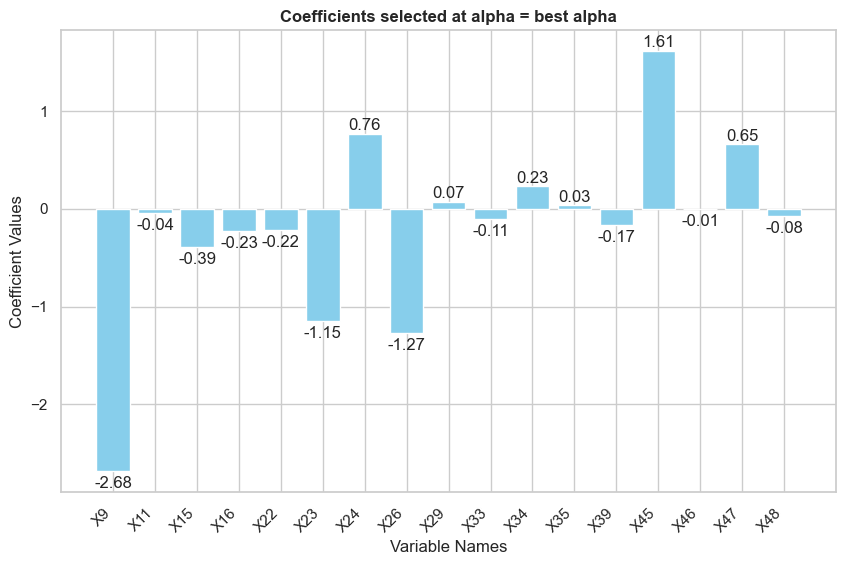

In [282]:
# Get the coefficients from the Lasso model
coefficients = lasso_model.coef_

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = coefficients[coefficients != 0]
non_zero_features = x_train.columns[coefficients != 0]

# Plot the non-zero coefficients in a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(non_zero_features, non_zero_coefficients, color='skyblue')
plt.title('Coefficients selected at alpha = best alpha', fontsize=12, fontweight='bold')
plt.xlabel('Variable Names')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=45, ha='right')

# Adding data
for bar, label in zip(bars, non_zero_coefficients):
    # Adjust vertical position based on the sign of the coefficient
    vertical_position = label + 0.01 if label >= 0 else label - 0.2
    plt.text(bar.get_x() + bar.get_width() / 2, vertical_position, f'{label:.2f}',
             ha='center', va='bottom')
    
plt.show()

In [ ]:
# Plotting the coefficients of the variables selected

# Finding indices of non-zero coefficients
non_zero_indices = np.nonzero(beta_variables.x)[0]

# Extracting non-zero coefficients and corresponding variable names
non_zero_coefficients = beta_variables.x[non_zero_indices]
non_zero_variable_names = np.array(x_train.columns)[non_zero_indices]

# Plotting the non-zero coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(non_zero_variable_names, non_zero_coefficients, color='skyblue')
plt.xlabel('Variable Names')
plt.ylabel('Coefficient Values')
plt.title('Variables selected at K=10', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding data
for bar, label in zip(bars, non_zero_coefficients):
    # Adjust vertical position based on the sign of the coefficient
    vertical_position = label + 0.01 if label >= 0 else label - 0.2
    plt.text(bar.get_x() + bar.get_width() / 2, vertical_position, f'{label:.2f}',
             ha='center', va='bottom')

plt.show()

In [226]:
# Calculate the residuals
residuals = y_test - y_pred_lasso

SSE_Lasso = sum(residuals**2)
MSE_Lasso = SSE_Lasso/n_rows_test

print ('Sum of squared errors in Test data is:', SSE_Lasso)
print ('Mean squared errors in Test data is:', MSE_Lasso)

Sum of squared errors in Test data is: 118.26568277284512
Mean squared errors in Test data is: 2.3653136554569025


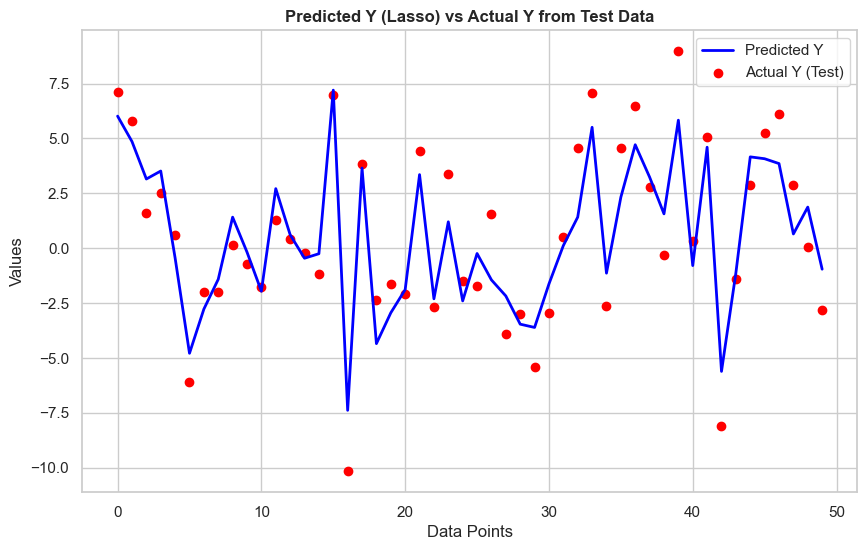

In [283]:
# Plotting the predicted y vs the actual y from test data

fig, ax = plt.subplots(figsize=(10, 6))

# Plot y_pred as a line graph
ax.plot(np.arange(len(y_pred_lasso)), y_pred_lasso, label='Predicted Y', color='blue', linewidth=2)


# Plot y_test as a scatter plot
ax.scatter(np.arange(len(y_test)), y_test, label='Actual Y (Test)', color='red', marker='o')

# Adding labels and title
ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Predicted Y (Lasso) vs Actual Y from Test Data', fontsize=12, fontweight='bold')

# Display legend
ax.legend()

# Show the plot
plt.show()


## Question 5 - Comparing variable selection vs Lasso

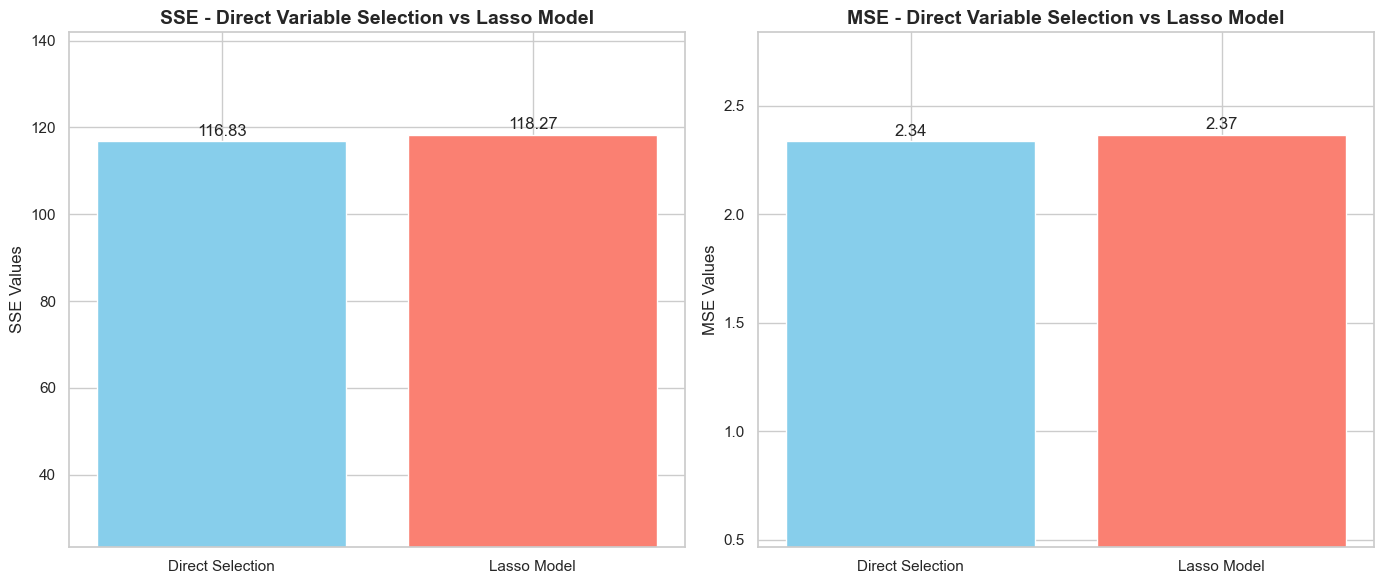

In [284]:
# Plotting errors from variable selection vs those from Lasso model

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
colors = ['skyblue', 'salmon']

# Bar plot for SSE_test vs SSE_Lasso
ax1.bar(['Direct Selection', 'Lasso Model'], [SSE_test, SSE_Lasso], color=colors)
ax1.set_ylabel('SSE Values')
ax1.set_title('SSE - Direct Variable Selection vs Lasso Model', fontsize=14, fontweight='bold')

# Bar plot for MSE_test vs MSE_Lasso
ax2.bar(['Direct Selection', 'Lasso Model'], [MSE_test, MSE_Lasso], color=colors)
ax2.set_ylabel('MSE Values')
ax2.set_title('MSE - Direct Variable Selection vs Lasso Model', fontsize=14, fontweight='bold')

# Adjusting axis limits
ax1.set_ylim(0.2* min(SSE_test, SSE_Lasso), 1.2*max(SSE_test, SSE_Lasso))
ax2.set_ylim(0.2* min(MSE_test, MSE_Lasso), 1.2*max(MSE_test, MSE_Lasso))

# Adding data labels
for p1, p2 in zip(ax1.patches, ax2.patches):
    ax1.annotate(f'{p1.get_height():.2f}', (p1.get_x() + p1.get_width() / 2., p1.get_height()*1.02), ha='center', va='center')
    ax2.annotate(f'{p2.get_height():.2f}', (p2.get_x() + p2.get_width() / 2., p2.get_height()*1.02), ha='center', va='center')


plt.tight_layout()
plt.show()


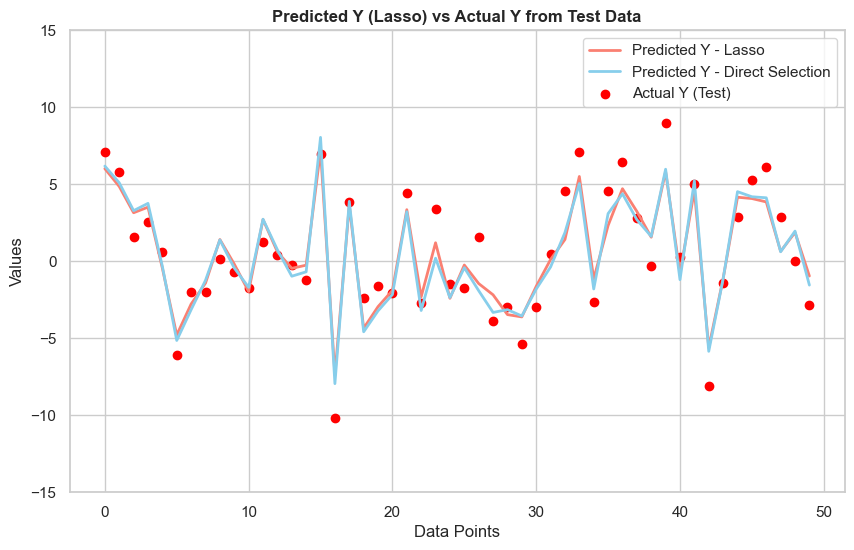

In [296]:
# Plotting the predicted y vs the actual y from test data

fig, ax = plt.subplots(figsize=(10, 6))

# Plot y_pred as a line graph
ax.plot(np.arange(len(y_pred_lasso)), y_pred_lasso, label='Predicted Y - Lasso', color='salmon', linewidth=2)
ax.plot(np.arange(len(y_pred)), y_pred, label='Predicted Y - Direct Selection', color='skyblue', linewidth=2)

# Plot y_test as a scatter plot
ax.scatter(np.arange(len(y_test)), y_test, label='Actual Y (Test)', color='red', marker='o')

# Adding labels and title
ax.set_xlabel('Data Points', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Predicted Y (Lasso) vs Actual Y from Test Data', fontsize=12, fontweight='bold')
plt.ylim(bottom=-15, top=15)

# Display legend
ax.legend(loc='upper right')

# Show the plot
plt.show()

**LASSO**

LASSO (Least Absolute Shrinkage and Selection Operator) is a regularization method that penalizes the L1 norm of the coefficients in a regression model. This penalization encourages the model to shrink the coefficients of less important variables to zero, effectively removing them from the model. LASSO is a relatively computationally efficient method, and it is often used when there are a large number of potential predictor variables.

- **Advantages:**
    - Computationally very fast
    - Can handle multicollinearity by selecting only one variable from a highly correlated group and shrinking the coefficients of the others to zero

- **Disadvantages:**
    - May not result in the optimal solution

**Direct Variable Selection**

In this method we used Gurobi and k-fold cross validation to identify the best k (number of variables in the subset) for which the validation error is minimum. Once k is identified, we run the model on the entire training dataset again to get the final results.

- **Advantages:**
    - Will result in optimal solution if all possible subsets of variables are tested
    - The reduction in error over lasso could be significant in the context of application

- **Disadvantages:**
    - Computationally slow

**Conclusion**

Whether to use LASSO or direct variable selection depends on a number of factors, including the computational budget, the number of predictor variables, and the presence of multicollinearity. If the number of predictor variables is small and the tolerance level in terms of error is very small, direct variable selection should be preferred as it would be feasible and would generate the optimal solution. On the other hand, LASSO is a good choice when there are a large number of potential predictor variables, or when the computational budget is limited, making direct variable selection infeasible.

**Recommendations for the Firm**

In this case we recommend that the firm continues to use LASSO in most cases becuase of the following reasons:
- We were able to generate the Lasso results almost instantly within seconds, whereas, for direct variable selection we had to run the code for close to 10 hours.

- The error from Lasso is indistinguishable from direct variable selection and the latter is only slightly better than the former.

However, we also recommend that the firm consider using direct variable selection in some cases. For example, direct variable selection may be a good choice when the number of predictor variables is relatively small, and when it is important to identify the true set of important variables.

In [265]:
# DataFrame to store Test errors
data = {
    'Model': ['Lasso', 'Direct Variable Selection'],
    'SSE': [SSE_Lasso, SSE_test],
    'MSE': [MSE_Lasso, MSE_test]
}

# Create the DataFrame
Test_Errors = pd.DataFrame(data)

# Set 'Model' as the index
Test_Errors.set_index('Model', inplace=True)

Test_Errors.to_csv('Test_Errors.csv', index=True)
